In [1]:
import os
from operator import itemgetter
from warnings import filterwarnings

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import clear_output
from tqdm.notebook import tqdm

filterwarnings('ignore')

In [2]:
def change_calculation(image: np.ndarray, percentage_change: float) -> int:
    """Function for calculating message size."""
    return round(image.size / 100) * percentage_change

In [3]:
def change_generation(image: np.ndarray, message_size: int) -> int:
    """Function for generating random numbers - key for encoding and decoding."""
    return np.random.permutation(np.arange(0, image.size))[:message_size]

In [4]:
def message_encoding(image: np.ndarray, location: int) -> np.ndarray:
    """Function for coding the message, here it is white noise."""
    image_flatten = image.flatten()
    
    for pixel in location:
        temp_image = image_flatten[pixel]
        noise = np.random.randint(0, 1)
        a, b = np.binary_repr(temp_image, width=7), np.binary_repr(noise, width=7)
        changes = a[:-1] + str(int(a[6]) ^ int(b[6]))
        image_flatten[pixel] = int(changes, 2)
        
    return np.reshape(image_flatten, image.shape)  

In [5]:
def series_length_method(image: np.ndarray) -> dict:
    """Implementation of the series length method."""
    image_flatten = image.flatten()
    result = ''
    series = {}
    identical_numbers = 1
    list_of_series_length = []
    
    for pixel in image_flatten:
        result += np.binary_repr(pixel, width=8)[7]

    for px in range(len(result) - 1):
        if result[px] == result[px + 1]:
            identical_numbers += 1
        else:
            list_of_series_length.append(identical_numbers)
            identical_numbers = 1
    
    list_of_series_length.append(identical_numbers)
    
    for i in list_of_series_length:
        flag = series.get(i)
        if flag is None:
            series[i] = 1
        else:
            series[i] += 1
            
    series_final = {a: b for a, b in series.items() if a < 13}
    series_final_sorted = dict(sorted(series_final.items(), key=itemgetter(1), reverse=True))
    return series_final_sorted

In [6]:
def plot(image_without_message, image_with_message, difference_image):
    """Function for drawing."""
    cmap = 'gray'
    plt.figure(figsize=(25, 25))
    plt.subplot(1, 3, 1)
    plt.axis('off')
    plt.title('Image without message')
    plt.imshow(image_without_message, cmap=cmap)
    plt.subplot(1, 3, 2)
    plt.axis('off')
    plt.title('Image with message')
    plt.imshow(image_with_message, cmap=cmap)
    plt.subplot(1, 3, 3)
    plt.axis('off')
    plt.title('Difference between without message and with message')
    plt.imshow(difference_image, cmap=cmap)
    plt.show()

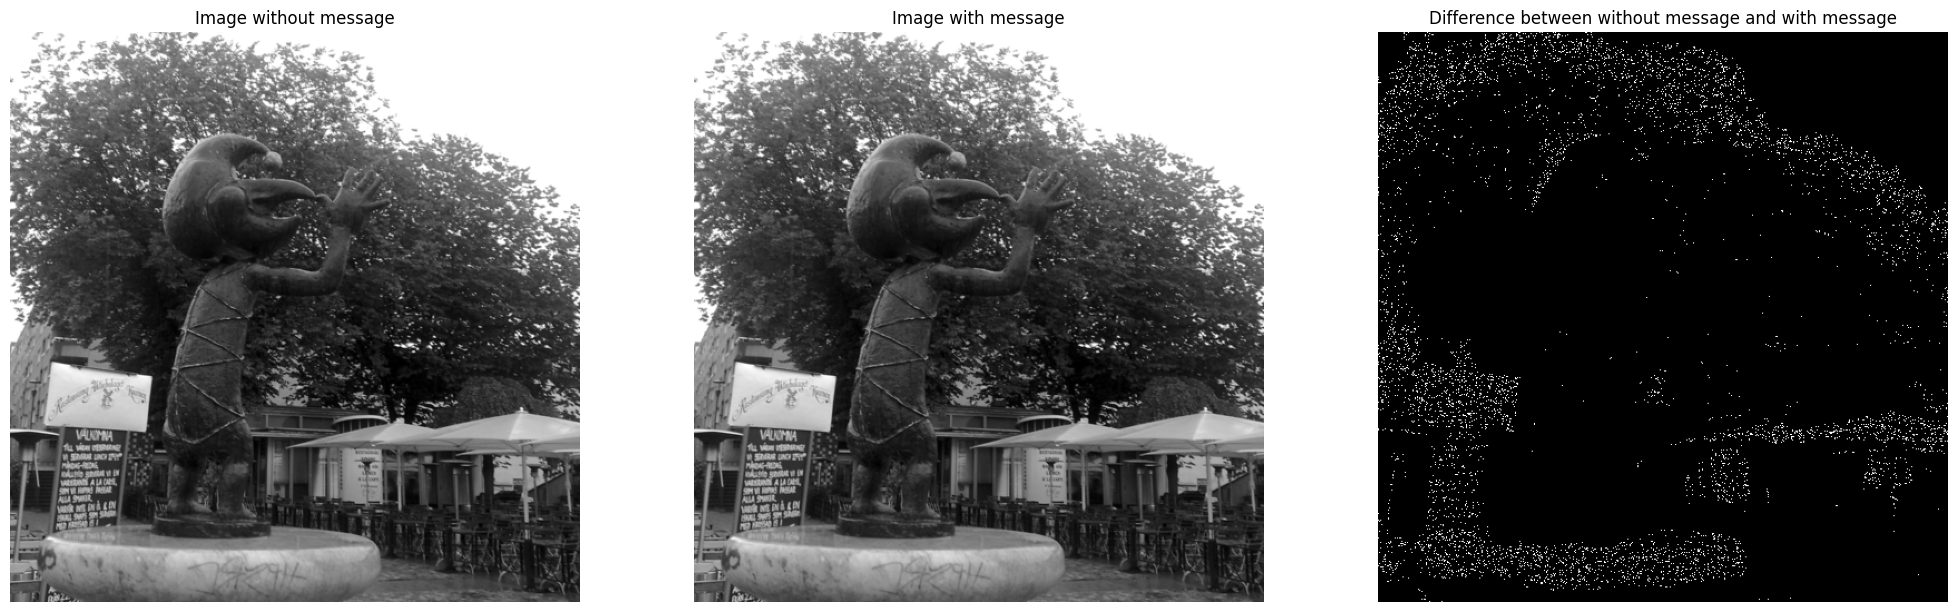

In [7]:
PERCENTAGE_CHANGE = 45
image_without_message = cv2.imread('../BOWS2/Image00036.tif', 0)
pixel_changes = change_calculation(image_without_message, PERCENTAGE_CHANGE)
image_with_message = message_encoding(image_without_message, change_generation(image_without_message, pixel_changes))
difference_image = image_with_message - image_without_message
plot(image_with_message, image_with_message, difference_image)

In [8]:
def create_dataset(path_to_dir: str, percentage: float):
    """function for creating a data set in pandas dataframe format."""
    df = pd.DataFrame({
        'image_name': [], 'sl_1': [], 'sl_2': [],
        'sl_3': [], 'sl_4': [], 'sl_5': [],
        'sl_6': [], 'sl_7': [], 'sl_8': [],
        'sl_9': [], 'sl_10': [], 'sl_11': [],
        'sl_12': [], 'target': []
    })
    
    first_df = []
    second_df = []
    images = os.listdir(path_to_dir)
    
    for i in tqdm(range(len(images) // 2), colour='GREEN'):
        image = cv2.imread(f'{path_to_dir}{images[i]}', 0)
        if isinstance(image, np.ndarray):
            pixel_changes = change_calculation(image, percentage)
            image_with_message = message_encoding(image, change_generation(image, pixel_changes))
            
            first_series = series_length_method(image_with_message)
            first_df.append({
                'image_name': images[i], 
                'sl_1': first_series[1], 
                'sl_2': first_series[2], 
                'sl_3': first_series[3],
                'sl_4': first_series[4], 
                'sl_5': first_series[5], 
                'sl_6': first_series[6], 
                'sl_7': first_series[7], 
                'sl_8': first_series[8],
                'sl_9': first_series[9], 
                'sl_10': first_series[10], 
                'sl_11': first_series[11], 
                'sl_12': first_series[12], 
                'target': 1
            })
    
    clear_output()
            
    for j in tqdm(range(len(images)), colour='GREEN'):
        image = cv2.imread(f'{path_to_dir}{images[j]}', 0)
        if isinstance(image, np.ndarray):   
            second_series = series_length_method(image)
            first_df.append({
                'image_name': images[j], 
                'sl_1': second_series[1], 
                'sl_2': second_series[2], 
                'sl_3': second_series[3],
                'sl_4': second_series[4], 
                'sl_5': second_series[5], 
                'sl_6': second_series[6], 
                'sl_7': second_series[7], 
                'sl_8': second_series[8],
                'sl_9': second_series[9], 
                'sl_10': second_series[10], 
                'sl_11': second_series[11], 
                'sl_12': second_series[12], 
                'target': 0
            })
            
    clear_output()
    
    df = df.append(first_df)
    df = df.append(second_df)
    return df

In [9]:
df_15 = create_dataset('../BOWS2/', 15)
df_15.to_csv('../data/15_percent.csv', index=False)

In [10]:
df_30 = create_dataset('../BOWS2/', 30)
df_30.to_csv('../data/30_percent.csv', index=False)

In [11]:
df_45 = create_dataset('../BOWS2/', 45)
df_45.to_csv('../data/45_percent.csv', index=False)

In [12]:
df_60 = create_dataset('../BOWS2/', 60)
df_60.to_csv('../data/60_percent.csv', index=False)

In [13]:
df_75 = create_dataset('../BOWS2/', 75)
df_75.to_csv('../data/75_percent.csv', index=False)

In [14]:
df_90 = create_dataset('../BOWS2/', 90)
df_90.to_csv('../data/90_percent.csv', index=False)